# <div style="text-align: center; background-color: #0C6A86; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">📊**Forecasting on Data Science blockchain transaction occurrence Dataset**</div>


# Libraries imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, \
                            roc_auc_score, roc_curve, \
                            confusion_matrix , auc
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

# EDA

In [2]:
data = pd.read_csv('data/train.csv')
data

,id,user_address,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_a_volatility,exchange_b_volatility,anonymous,result
0,8,0x930B,84139.092267,44.193560,0,0,66.742521,66.8325,very high,0.000367,A113,0
1,12,0x5779,34609.449276,331.501171,0,0,41.429574,41.5401,low,0.000695,M958,0
2,28,0x5779,30598.783296,1581.902691,0,0,35.817631,35.8701,very low,0.000431,F255,0
3,50,0x5779,20992.680359,1260.406181,0,0,47.711827,47.8233,low,0.000456,F2332,0
4,56,0xD47A,120838.946555,180.090128,0,0,52.812842,52.6869,low,NaN,A198,0
...,...,...,...,...,...,...,...,...,...,...,...,...
338482,3988947,0x5779,29374.263175,352.561329,0,0,46.680615,46.6683,medium,0.000435,M142,0
338483,3988948,0x5AEe,50847.577759,239.577796,0,0,72.139667,360.4125,low,0.000452,A131,0
338484,3988961,0x930B,121303.381921,160.222687,0,0,52.285416,52.3887,low,0.000285,A2158,0
338485,3988964,0x5779,18515.028195,1927.485662,0,0,38.559282,38.6211,very low,0.000185,F1831,0


In [3]:
data.isnull().sum()

id                                      0
user_address                            0
user_balance_usd                        0
user_balance_coin_a                     0
user_historical_transactions_10s        0
user_historical_transactions_30s        0
exchange_a_price                    28642
exchange_b_price                        0
exchange_a_volatility               15210
exchange_b_volatility                7922
anonymous                               0
result                                  0
dtype: int64

In [4]:
data.corr()['result'].sort_values(ascending= False)

result                              1.000000
user_historical_transactions_30s    0.421841
user_historical_transactions_10s    0.354665
exchange_b_volatility               0.198650
exchange_a_price                    0.089232
exchange_b_price                    0.036113
user_balance_coin_a                 0.017267
id                                  0.000897
user_balance_usd                   -0.018770
Name: result, dtype: float64

In [5]:
data= data.dropna()

In [6]:
null_columns = data.isnull().sum()
null_columns

id                                  0
user_address                        0
user_balance_usd                    0
user_balance_coin_a                 0
user_historical_transactions_10s    0
user_historical_transactions_30s    0
exchange_a_price                    0
exchange_b_price                    0
exchange_a_volatility               0
exchange_b_volatility               0
anonymous                           0
result                              0
dtype: int64

In [7]:
X = data.drop(columns = ['result'])
y = data['result'].copy()

In [8]:
X

,id,user_address,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_a_volatility,exchange_b_volatility,anonymous
0,8,0x930B,84139.092267,44.193560,0,0,66.742521,66.8325,very high,0.000367,A113
1,12,0x5779,34609.449276,331.501171,0,0,41.429574,41.5401,low,0.000695,M958
2,28,0x5779,30598.783296,1581.902691,0,0,35.817631,35.8701,very low,0.000431,F255
3,50,0x5779,20992.680359,1260.406181,0,0,47.711827,47.8233,low,0.000456,F2332
5,78,0x5AEe,46749.264981,272.167309,0,0,68.627842,68.6049,low,0.000188,A2222
...,...,...,...,...,...,...,...,...,...,...,...
338481,3988935,0x5779,72909.885451,352.813282,0,0,66.309526,66.1437,low,0.000158,A1227
338482,3988947,0x5779,29374.263175,352.561329,0,0,46.680615,46.6683,medium,0.000435,M142
338483,3988948,0x5AEe,50847.577759,239.577796,0,0,72.139667,360.4125,low,0.000452,A131
338484,3988961,0x930B,121303.381921,160.222687,0,0,52.285416,52.3887,low,0.000285,A2158


In [9]:
X.columns

Index(['id', 'user_address', 'user_balance_usd', 'user_balance_coin_a',
       'user_historical_transactions_10s', 'user_historical_transactions_30s',
       'exchange_a_price', 'exchange_b_price', 'exchange_a_volatility',
       'exchange_b_volatility', 'anonymous'],
      dtype='object')

In [10]:
data_columns = list(X.columns)
varibles_to_ordinal_encode = ['exchange_a_volatility']
varibles_to_impute = list(null_columns[null_columns>0].index)
varibles_to_impute_num = ['exchange_a_price',  'exchange_b_volatility']
varibles_to_impute_cat = ['exchange_a_volatility']
varibles_to_drop = ['id','user_historical_transactions_10s']
data_numiric = [x for x in X._get_numeric_data().columns if x not in varibles_to_drop ]
data_cat = [x for x in data_columns if x not in data_numiric and x not in varibles_to_drop]
varibles_to_hot_encode = ['user_address','anonymous']
data_cat

['user_address', 'exchange_a_volatility', 'anonymous']

In [11]:
X_cop = X.assign( anonymous = X.anonymous.str.extract('([A-Z]+)'))
X_cop


,id,user_address,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_a_volatility,exchange_b_volatility,anonymous
0,8,0x930B,84139.092267,44.193560,0,0,66.742521,66.8325,very high,0.000367,A
1,12,0x5779,34609.449276,331.501171,0,0,41.429574,41.5401,low,0.000695,M
2,28,0x5779,30598.783296,1581.902691,0,0,35.817631,35.8701,very low,0.000431,F
3,50,0x5779,20992.680359,1260.406181,0,0,47.711827,47.8233,low,0.000456,F
5,78,0x5AEe,46749.264981,272.167309,0,0,68.627842,68.6049,low,0.000188,A
...,...,...,...,...,...,...,...,...,...,...,...
338481,3988935,0x5779,72909.885451,352.813282,0,0,66.309526,66.1437,low,0.000158,A
338482,3988947,0x5779,29374.263175,352.561329,0,0,46.680615,46.6683,medium,0.000435,M
338483,3988948,0x5AEe,50847.577759,239.577796,0,0,72.139667,360.4125,low,0.000452,A
338484,3988961,0x930B,121303.381921,160.222687,0,0,52.285416,52.3887,low,0.000285,A


In [12]:
X.dtypes

id                                    int64
user_address                         object
user_balance_usd                    float64
user_balance_coin_a                 float64
user_historical_transactions_10s      int64
user_historical_transactions_30s      int64
exchange_a_price                    float64
exchange_b_price                    float64
exchange_a_volatility                object
exchange_b_volatility               float64
anonymous                            object
dtype: object

In [13]:
X.describe()

,id,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_b_volatility
count,2.890600e+05,289060.000000,289060.000000,289060.000000,289060.000000,289060.000000,289060.000000,289060.000000
mean,1.994087e+06,65063.312780,498.576972,0.012873,0.081471,53.228849,58.945932,0.000459
std,1.151833e+06,29566.405394,472.233153,0.115515,0.359131,12.212564,36.687437,0.000334
min,8.000000e+00,1.914401,0.018030,0.000000,0.000000,31.364604,31.027500,0.000000
25%,9.975918e+05,43776.038276,155.483841,0.000000,0.000000,43.753319,43.850100,0.000248
50%,1.993438e+06,61555.386368,365.290557,0.000000,0.000000,48.620211,49.677600,0.000375
75%,2.989981e+06,81446.770494,682.783782,0.000000,0.000000,66.051453,66.614100,0.000570
max,3.988964e+06,132234.436367,2450.614257,3.000000,6.000000,82.553638,487.733400,0.010446


# split the data trainset and validation set 

In [15]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [16]:
X_train.shape

(202342, 11)

In [17]:
y_train.value_counts()

0    188288
1     14054
Name: result, dtype: int64

# Resampling the data due to the bad distribution of the labels

In [18]:
rus_sampler = RandomOverSampler(sampling_strategy=.5, random_state=42)
X_resample , y_resample = rus_sampler.fit_resample(X_train,y_train)

In [19]:
X_resample.shape

(282432, 11)

In [20]:
y_resample.value_counts()

0    188288
1     94144
Name: result, dtype: int64

# making functions and the pipeline workflow

In [21]:
class changing_on_data(BaseEstimator, TransformerMixin):
    
    def transform(self, X, *_):
        
        X_copy = X.copy()
        X_copy = X_copy.assign( anonymous = X_copy.anonymous.str.extract('([A-Z]+)'))
        X_copy = X_copy.drop(columns = varibles_to_drop)
        return X_copy
    def fit(self, *_):
        return self

In [22]:
X_copy =changing_on_data().fit_transform( X_resample)
X_copy

,user_address,user_balance_usd,user_balance_coin_a,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_a_volatility,exchange_b_volatility,anonymous
0,0x5779,107128.203271,457.940680,1,48.740878,48.7557,low,0.000304,A
1,0x5AEe,47589.070967,259.772804,0,68.629359,68.6931,low,0.000343,A
2,0x5AEe,56674.524539,165.111328,3,69.713009,139.8390,low,0.001385,A
3,0x5AEe,46564.363688,298.553333,0,73.750499,73.4265,medium,0.000551,A
4,0x930B,59888.496848,404.600846,0,70.815251,70.7049,low,0.000202,A
...,...,...,...,...,...,...,...,...,...
282427,0x5AEe,64866.892309,13.304379,2,63.552941,63.4305,very high,0.001283,A
282428,0x5779,28443.764702,1583.847853,0,47.358861,47.1933,low,0.000753,M
282429,0x5AEe,63964.840381,17.244011,1,65.335274,65.2281,low,0.000569,A
282430,0x5779,85244.499318,568.906436,0,65.117565,65.0013,low,0.000265,A


In [23]:
ohe =OneHotEncoder()

# save data to scale (no need to reshape)
hot = X_copy[varibles_to_hot_encode]

# fit transformer to data
ohe.fit(hot)

# create new feature by transforming the data
X_ohe = ohe.transform(hot)
ohe_columns =  ['0x5779','0x5AEe','0x930B' , '0x56ab', '0x5aee','0xD47A','0xd47a','0x930b']+['A','F','M'] 

In [24]:
ordinalencoder = ce.ordinal.OrdinalEncoder()

# save data to scale (no need to reshape)
ordd = X_copy[varibles_to_ordinal_encode]

# fit transformer to data
ordinalencoder.fit(ordd)

# create new feature by transforming the data
X_encoded = ordinalencoder.transform(ordd)
encoded_columns = list(X_encoded.columns)
encoded_columns

['exchange_a_volatility']

In [25]:
numpipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('sclr',StandardScaler())
])
ordinal_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ("ord_encode", ce.ordinal.OrdinalEncoder())
])
catpipe = ColumnTransformer([
    ('ordinal_encode',ordinal_pipe,varibles_to_impute_cat),
 ("hot_encode", ce.one_hot.OneHotEncoder(),varibles_to_hot_encode)
])
full_transformer = ColumnTransformer([

    ('num',numpipe,data_numiric),
 ('cat',catpipe,data_cat)
 ])
pipe_to_show = Pipeline([
   ('changeing_data',changing_on_data()),
    
    ("full_transformer",full_transformer)
   
])
pipe = Pipeline([
   ('changeing_data',changing_on_data()),
    ("full_transformer",full_transformer),
    ('model',DecisionTreeClassifier(max_depth=7, max_features=9))
])

In [26]:
new_attrib = data_numiric+encoded_columns+ohe_columns

In [28]:
# df = pd.DataFrame(pipe_to_show.fit_transform(X_resample),columns =new_attrib)
# df

# First baseline model using DecisionTree 

In [29]:
pipe.fit(X_resample,y_resample)

Pipeline(steps=[('changeing_data', changing_on_data()),
                ('full_transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('sclr',
                                                                   StandardScaler())]),
                                                  ['user_balance_usd',
                                                   'user_balance_coin_a',
                                                   'user_historical_transactions_30s',
                                                   'exchange_a_price',
                                                   'exchange_b_price',
                                                   'exchange_b_volatility']),
                                                 ('cat',
                                                  ColumnTransformer(transformers=[('ordinal_encode',
                                                                                   Pipeline(steps=[('imputer',
                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                   ('ord_encode',
                                                                                                    OrdinalEncoder())]),
                                                                                   ['exchange_a_volatility']),
                                                                                  ('hot_encode',
                                                                                   OneHotEncoder(),
                                                                                   ['user_address',
                                                                                    'anonymous'])]),
                                                  ['user_address',
                                                   'exchange_a_volatility',
                                                   'anonymous'])])),
                ('model', DecisionTreeClassifier(max_depth=7, max_features=9))])

# Taking a look to the feature importance 

In [36]:
def feature_importance(X,y):
    X_copy = pipe_to_show.fit_transform(X)
    dt = DecisionTreeClassifier(max_depth=7, max_features=9)
    dt.fit(X_copy,y)
    X_val_copy = pipe_to_show.transform(X_val)
    pred_proba = dt.predict_proba(X_val_copy)[:,1]
    roc_auc1 = roc_auc_score(y_val, pred_proba)
    print(roc_auc1)
    return sorted(zip(dt.feature_importances_,new_attrib))
feature_importance(X_resample,y_resample)

0.820244804400736


[(0.0, '0x5779'),
 (0.0, '0x5aee'),
 (0.0, '0x930B'),
 (0.0, '0x930b'),
 (0.0, '0xD47A'),
 (0.0, '0xd47a'),
 (0.0, 'F'),
 (9.286540341281446e-05, 'M'),
 (0.0004933188934813705, '0x5AEe'),
 (0.0037783310248882076, 'exchange_b_price'),
 (0.004540585735471097, '0x56ab'),
 (0.0045877238885559364, 'exchange_a_volatility'),
 (0.0069257993658133985, 'exchange_a_price'),
 (0.016903319936188425, 'user_balance_usd'),
 (0.03477694794752679, 'user_balance_coin_a'),
 (0.04168924714826742, 'A'),
 (0.12078493555184526, 'exchange_b_volatility'),
 (0.7654269251045495, 'user_historical_transactions_30s')]

# forecasting on the validation set to evaluate the model

Score: 0.8190606753258265


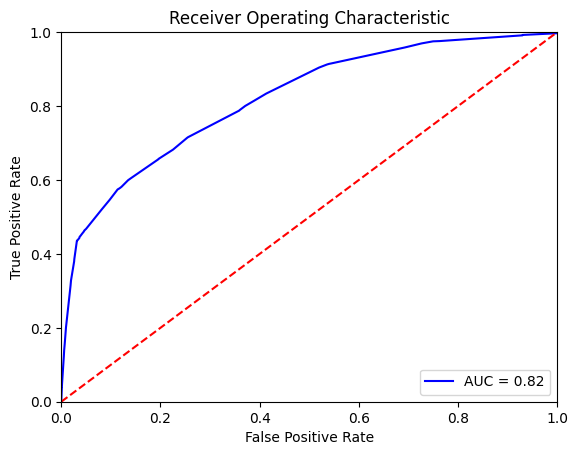

In [31]:
pred_proba = pipe.predict_proba(X_val)[:,1]
fpr, tpr, threshold = roc_curve(y_val,pred_proba)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("Score: "+ str(roc_auc))
plt.show()

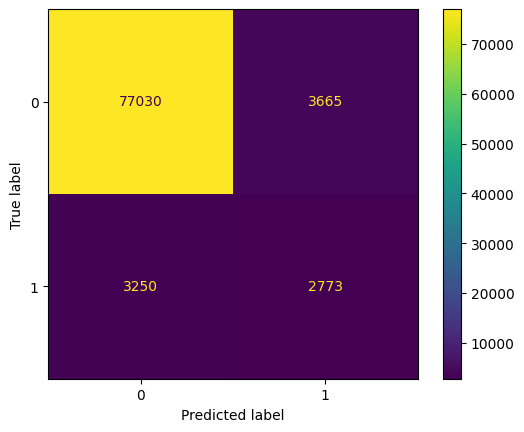

In [32]:
pred = pipe.predict(X_val)
confmat = confusion_matrix(y_true=y_val, y_pred=pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confmat,
                               display_labels=pipe.classes_)
disp.plot();

# Trying different classifiers

In [33]:
names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "sgd",
  "gb"  

]

classifierse = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    SGDClassifier(loss='modified_huber', shuffle=True,random_state=101),
    GradientBoostingClassifier(learning_rate=.1, n_estimators=10)
]
classifiers =  {x : y for x,y in zip(names,classifierse)}
classifiers

{'Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
 'Decision Tree': DecisionTreeClassifier(max_depth=5),
 'Random Forest': RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10),
 'AdaBoost': AdaBoostClassifier(),
 'Naive Bayes': GaussianNB(),
 'sgd': SGDClassifier(loss='modified_huber', random_state=101),
 'gb': GradientBoostingClassifier(n_estimators=10)}

In [34]:
for cal,model in classifiers.items():
    pipe2 =  Pipeline([('changeing_data',changing_on_data()),
                       ("full_transformer",full_transformer),
                       (cal,model)])
    pipe2.fit(X_resample,y_resample)
    pred_proba = pipe2.predict_proba(X_val)[:,1]
    roc_auc = roc_auc_score(y_val, pred_proba)
    print(f'model : {cal} has aucroc = {roc_auc}')

model : Nearest Neighbors has aucroc = 0.6872974456293731
model : Decision Tree has aucroc = 0.8200507386451776
model : Random Forest has aucroc = 0.7988059969674256
model : AdaBoost has aucroc = 0.8210281586076102
model : Naive Bayes has aucroc = 0.7924951800673784
model : sgd has aucroc = 0.8154264478266526
model : gb has aucroc = 0.8188460952350108
